На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:

    product_id  quantity    name             date
0       56          2         Anatoly_Karpov   2020-12-30
1       7           2         Anatoly_Karpov   2020-12-30
2       9           3         Anatoly_Karpov   2020-12-30

In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir('/home/jupyter-a.komova-13/shared/homeworks/python_ds_miniprojects/4/data/')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [3]:
full_path = []
dfs = []

for subdir, dirs, files in os.walk('/home/jupyter-a.komova-13/shared/homeworks/python_ds_miniprojects/4/data/'):
    for file in files:
        full_path.append(os.path.join(subdir, file))
       
        
#dfs = [pd.read_csv(csv_path) for csv_path in full_path]

for filename in full_path:
    df = pd.read_csv(filename)
    df['name'] = os.path.dirname(filename).split('/')[-1]
    df['date'] = os.path.dirname(filename).split('/')[-2]
    dfs.append(df)





df = pd.concat(dfs).reset_index(drop=True)

In [4]:
df.head(10)

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
5,0,55,3,Petr_Smirnov,2020-12-05
6,1,49,3,Petr_Smirnov,2020-12-05
7,2,22,5,Petr_Smirnov,2020-12-05
8,3,83,4,Petr_Smirnov,2020-12-05
9,0,66,2,Rostislav_Smirnov,2020-12-05


Выясните, какой пользователь купил больше всего товаров

In [5]:
df.quantity.sum()

480

In [6]:
df.groupby('name') \
    .agg({'quantity' : 'sum'}) \

,quantity
name,
Alexey_Fedorov,24
Alexey_Ivanov,17
Alexey_Petrov,7
Alexey_Smirnov,52
Anton_Ivanov,23
Anton_Petrov,18
Anton_Smirnov,45
Kirill_Fedorov,28
Kirill_Petrov,9


In [7]:
df.groupby('name') \
    .agg({'quantity' : 'sum'}) \
    .sort_values('quantity', ascending = False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

In [8]:
best_product = df.groupby('product_id', as_index = False) \
    .agg({'quantity' : 'sum'}) \
    .sort_values('quantity', ascending = False)

In [9]:
best_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


In [11]:
best_product.query('product_id == "56"')

,product_id,quantity
42,56,18


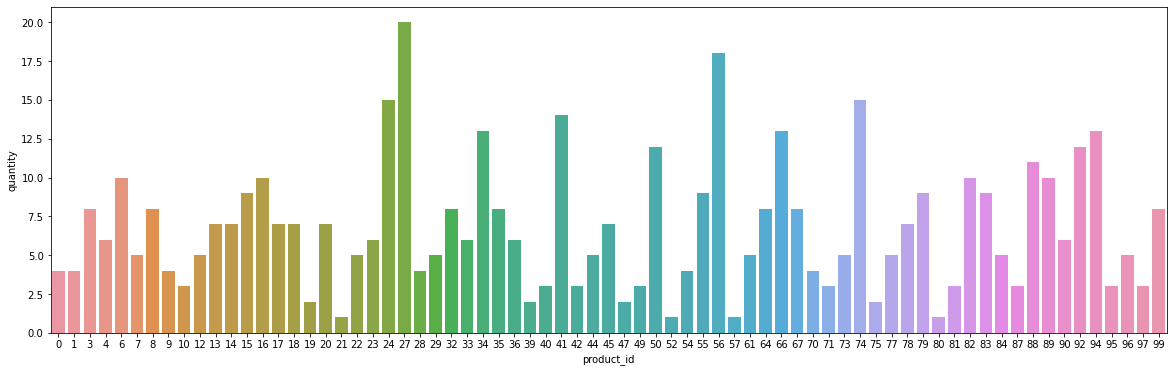

In [12]:
plt.figure(figsize=[20,6])
sns.barplot(x=best_product.product_id, y=best_product.quantity)

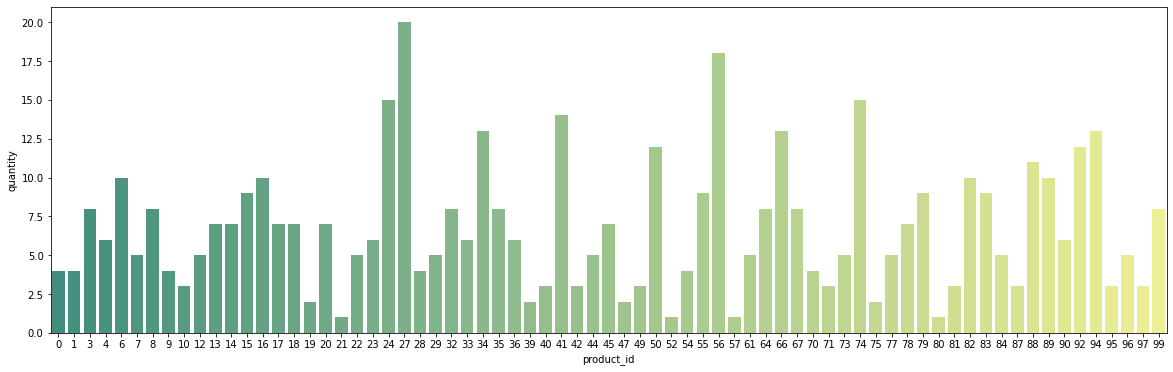

In [17]:
plt.figure(figsize=[20,6])
sns.barplot(x='product_id', y='quantity', data=best_product, palette = 'summer', alpha = 0.8)

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [18]:
best_date = df.groupby('date', as_index = False) \
    .agg({'quantity' : 'sum'}) \
    .sort_values('date', ascending = False)

In [19]:
best_date

,date,quantity
6,2020-12-09,69
5,2020-12-08,68
4,2020-12-07,94
3,2020-12-06,15
2,2020-12-05,61
1,2020-12-04,113
0,2020-12-03,60


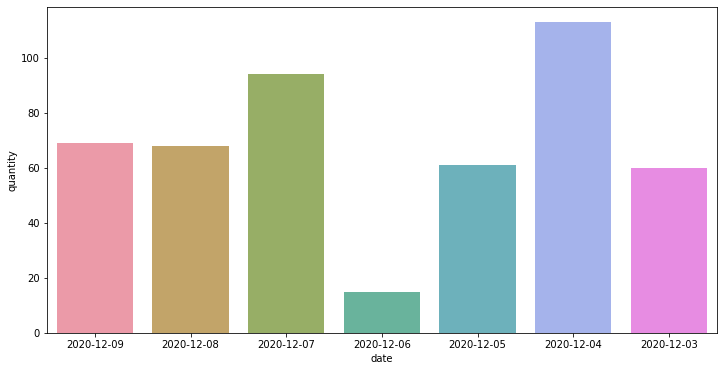

In [20]:
plt.figure(figsize=[12,6])
sns.barplot(x='date', y='quantity', data=best_date, palette = 'husl', alpha = 0.8)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [21]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [22]:
df.shape

(161, 5)

In [23]:
df.query('name == "Anton_Ivanov"')

,Unnamed: 0,product_id,quantity,name,date
59,0,92,4,Anton_Ivanov,2020-12-09
60,1,88,3,Anton_Ivanov,2020-12-09
61,2,24,5,Anton_Ivanov,2020-12-09
62,3,36,1,Anton_Ivanov,2020-12-09
63,4,15,3,Anton_Ivanov,2020-12-09
64,5,90,3,Anton_Ivanov,2020-12-09
155,0,15,4,Anton_Ivanov,2020-12-07


In [24]:
no_duplicates = df.drop_duplicates(subset=['name', 'product_id', 'date'])

In [25]:
no_duplicates.query('name == "Alexey_Fedorov"')

,Unnamed: 0,product_id,quantity,name,date
18,0,13,2,Alexey_Fedorov,2020-12-05
19,1,50,2,Alexey_Fedorov,2020-12-05
35,0,73,5,Alexey_Fedorov,2020-12-08
36,1,34,1,Alexey_Fedorov,2020-12-08
37,2,71,1,Alexey_Fedorov,2020-12-08
38,3,18,2,Alexey_Fedorov,2020-12-08
39,4,67,2,Alexey_Fedorov,2020-12-08
147,0,54,1,Alexey_Fedorov,2020-12-07
148,1,77,3,Alexey_Fedorov,2020-12-07
149,2,99,4,Alexey_Fedorov,2020-12-07


In [26]:
no_duplicates.shape

(160, 5)

In [27]:
a = no_duplicates.groupby(['name', 'product_id'], as_index = False) \
    .agg({'date' : 'count'})

In [28]:
a

,name,product_id,date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [29]:
b = a.query('date > 1') \
    .groupby('name', as_index = False) \
    .agg({'date' : 'sum'})

In [30]:
b

,name,date
0,Anton_Ivanov,2
1,Petr_Fedorov,2


И небольшой минипроект на фильтрацию данных!

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

inn.xls — таблица в экселевском формате
necessary_inn.txt — перечень необходимых ИНН в текстовом формате
Задачи:
извлечь из таблицы записи с ИНН, указанными в текстовом файле
записать результат в файл selected_inn.csv

In [31]:
inn = pd.read_excel('/home/jupyter-a.komova-13/lesson_4/4_inn.xls')

In [32]:
necessary_inn = pd.read_csv('/home/jupyter-a.komova-13/lesson_4/4_necessary_inn.txt', header = None, names=["inn"])

In [33]:
inn.dtypes

Unnamed: 0                 int64
#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [34]:
inn

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2105,2105,"ИП «Зайцев, Шубин и Дементьева»",6580539599719,"к. Чебаркуль, бул. Кольцевой, д. 19 к. 3, 911953",Назар Гордеевич Миронов,Дефектолог,575321775842,8 (390) 976-88-54,juvenali_66@ao.edu,aviakompanija.edu,2007-02-01,2014-10-29,13383530491,62100202894,Gudermes,"г. Миасс, пр. Пожарского, д. 39 стр. 880, 386211",Охват прозрачных методик,88659854892,61232741869
2106,2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265
2107,2107,2107,Антонова Лимитед,7659150538516,"г. Ноябрьск, пр. Весенний, д. 418, 214696",Александров Радим Ярославович,Дознаватель,576824176737,+7 (135) 034-6805,chernovlongin@rambler.ru,krilov.net,2018-11-03,2016-06-15,39266483828,21174514029,Sharypovo,"с. Щелково, алл. Попова, д. 143 к. 811, 155684",Мотивация сенсационных решений,9278989412,77350481806
2108,2108,2108,ООО «Хохлов Казаков»,9506828156265,"к. Липецк, наб. Халтурина, д. 60, 449290",Воробьев Сидор Фролович,Снайпер,157426408379,+7 172 548 4422,qpanova@hotmail.com,oao.org,1980-07-02,2009-11-23,76945273610,95601014531,Privolzhskiy,"п. Токма, ш. 50 лет Победы, д. 730, 791941",Охват серверных результатов,84921082372,85023560472


In [35]:
necessary_inn

,inn
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615
...,...
110,664306216794
111,991951385204
112,129413497752
113,447901012904


In [36]:
necessary_inn.dtypes

inn    int64
dtype: object

In [37]:
inn.query('head_inn == "271011690615"')

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
1186,1186,1186,Тетра Пак (Tetra Pak),6812089812666,"ст. Санкт-Петербург, пер. Краснознаменный, д. ...",Харлампий Алексеевич Игнатьев,Биоинженер,271011690615,+75128733627,viktor_1980@gmail.com,beljaeva.org,2008-11-26,1976-07-21,65685202778,69271521897,Bavly,"к. Плесецк, пр. Нижний, д. 23, 540525",Ускорение кроссплатформенных технологий,71264569864,57268704622


In [38]:
a = necessary_inn['inn']

In [39]:
a

0      394609645484
1      281578625230
2      923769811917
3      998694734508
4      271011690615
           ...     
110    664306216794
111    991951385204
112    129413497752
113    447901012904
114    634037614688
Name: inn, Length: 115, dtype: int64

In [40]:
selected_inn = inn.query('head_inn in @a')

In [41]:
selected_inn

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
47,47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2059,2059,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,valentin1979@oao.org,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
2074,2074,2074,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,nikandrzhukov@gmail.com,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
2089,2089,2089,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,vadim05@ooo.biz,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
2106,2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265


In [42]:
selected_inn = selected_inn.rename(columns = {'income,RUB' : 'income_RUB'})

In [43]:
selected_inn

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB",income_RUB
47,47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2059,2059,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,valentin1979@oao.org,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
2074,2074,2074,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,nikandrzhukov@gmail.com,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
2089,2089,2089,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,vadim05@ooo.biz,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
2106,2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265


В качестве проверки укажите сумму колонки income,RUB в отобранных данных.

In [44]:
selected_inn.income_RUB.sum()

6104522627393

In [45]:
selected_inn.to_csv('selected_inn.csv')